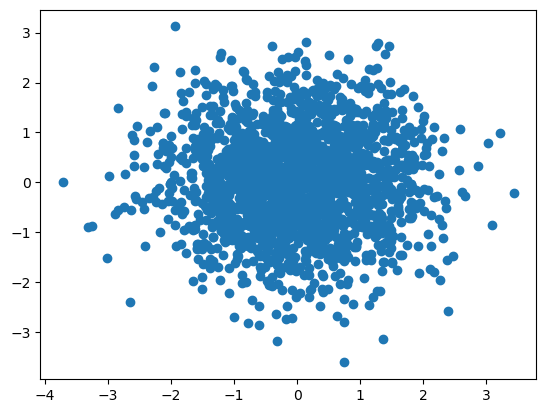

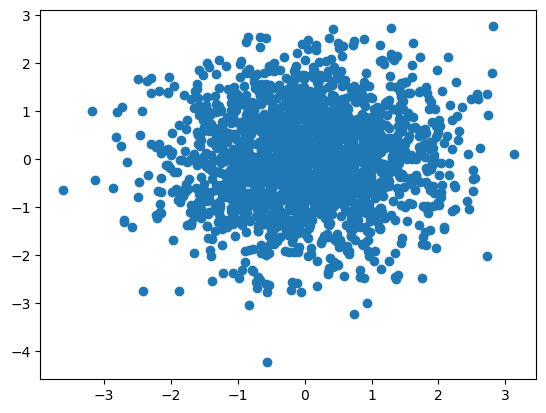

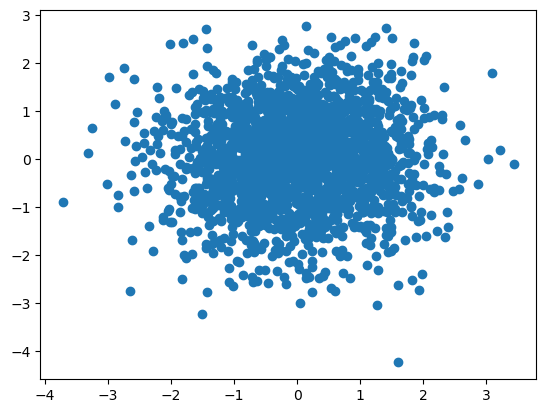

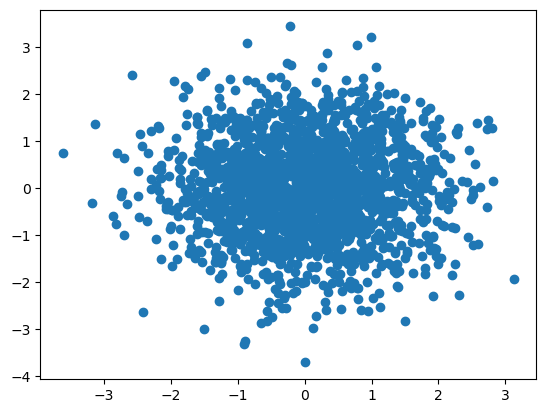

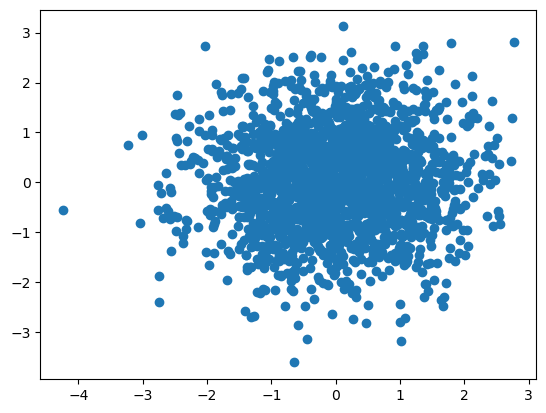

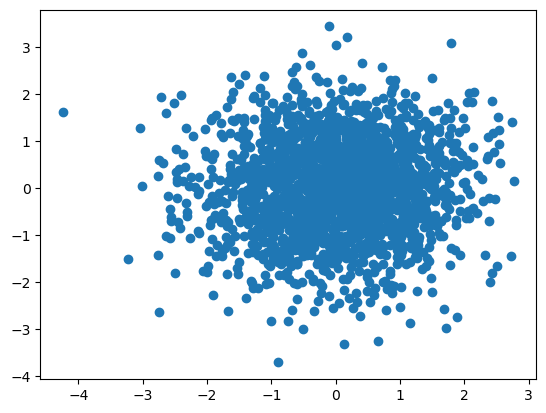

In [35]:
#1

import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('data/regression_generated.csv', header=0)

features_1=df['features_1']
features_2=df['features_2']
features_3=df['features_3']

plt.scatter(features_1, features_2)
plt.show()

plt.scatter(features_2, features_3)
plt.show()

plt.scatter(features_1, features_3)
plt.show()

plt.scatter(features_2, features_1)
plt.show()

plt.scatter(features_3, features_2)
plt.show()

plt.scatter(features_3, features_1)
plt.show()

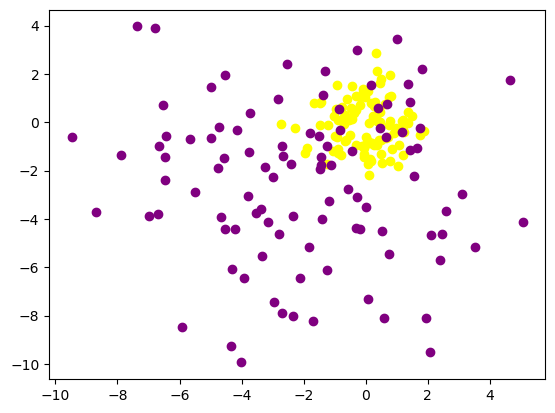

In [36]:
#2
import random
import pandas as pd
import matplotlib.pyplot as plt


def gauss_2d(mean, sd):
    x = random.gauss(mean, sd)
    y = random.gauss(mean, sd)
    return x, y


def gaussian_generator(mean1, sd1, mean2, sd2):
    c1_x = []
    c1_y = []
    c2_x = []
    c2_y = []
    for i in range(100):
        x, y = gauss_2d(mean1, sd1)
        c1_x.append(x)
        c1_y.append(y)
        x, y = gauss_2d(mean2, sd2)
        c2_x.append(x)
        c2_y.append(y)
    return c1_x, c1_y, c2_x, c2_y


c1_x, c1_y, c2_x, c2_y = gaussian_generator(0, 1, -2, 3)
plt.scatter(c1_x, c1_y, c='yellow')
plt.scatter(c2_x, c2_y, c='purple')
plt.show()

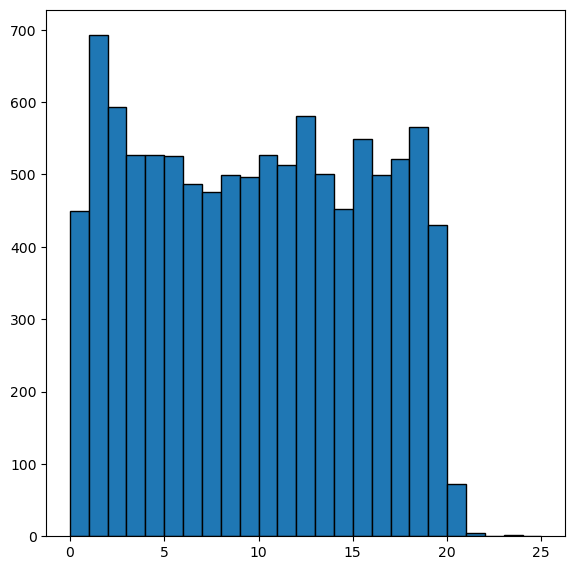

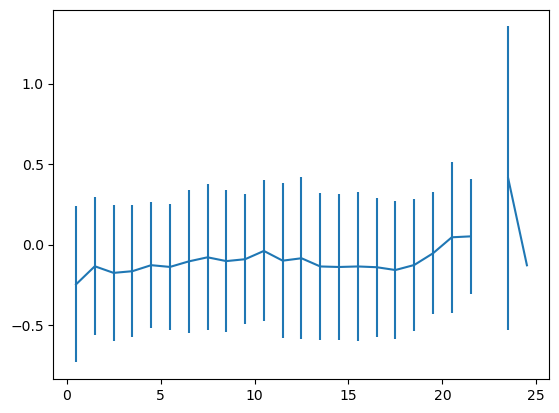

In [37]:
#3
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


temp = df.copy()

data = pd.read_pickle("data/residuals_261.pkl").item() #item
df = pd.DataFrame({'residuals': data['residuals'], 'distances': data['distances']})

df = df[np.abs(df['residuals']) < 2]
sns.jointplot(data=df, x="distances", y="residuals")
sns.regplot(data=df, x="distances", y="residuals", line_kws=dict(color="r"))


#=The graph thickens to zero

plt.clf()
left_edges = [*np.arange(0, 25, 1.0)]
right_edges = left_edges[1::] + [25]
counts = df.apply(pd.Series.value_counts, bins=left_edges+[25])
y = counts["distances"]
w = np.array(right_edges) - np.array(left_edges)
plt.bar(left_edges, y, width=w, align='edge', edgecolor="black")
plt.show()

bins=left_edges+[25]
x = [*np.arange(0.5, 25, 1.0)]
from scipy.stats import binned_statistic
y = binned_statistic(df['distances'], df['residuals'], 
                             statistic='mean', 
                             bins=bins).statistic

err_y = binned_statistic(df['distances'], df['residuals'], 
                             statistic='std', 
                             bins=bins).statistic

plt.errorbar(x, y, yerr=err_y)
plt.show()

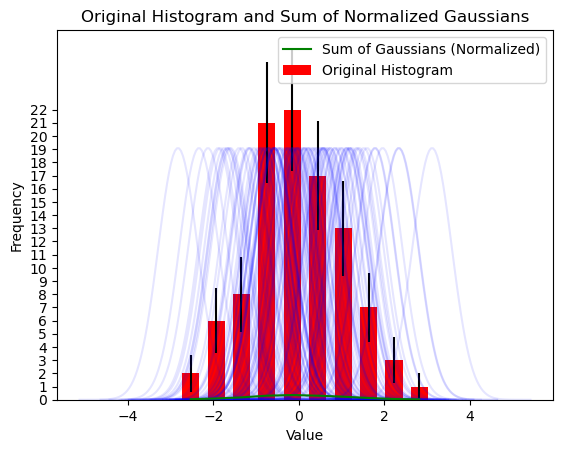

In [17]:
#6
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapz

mu, sigma = 0, 1
x = np.random.normal(mu, sigma, 100)
y, edges = np.histogram(x, bins=10)
plt.ylabel('Frequency')
yint = range(0, math.ceil(max(y)) + 1)
plt.yticks(yint)
bincenters = 0.5 * (edges[1:] + edges[:-1])
menStd = np.sqrt(y)
plt.bar(bincenters, y, width=0.4, color='r', yerr=menStd, label='Original Histogram')

default = 1.06 * x.std() * (x.size ** (-1/5))

for mean in x:
    gaussian = norm(loc=mean, scale=default)
    x_values = np.linspace(mean - 5 * default, mean + 5 * default, 100)
    y_values = gaussian.pdf(x_values)
    plt.plot(x_values, y_values * max(y), color='blue', alpha=0.1)

sum_of_gaussians = np.sum([norm(loc=mean, scale=default).pdf(bincenters) for mean in x], axis=0)
sum_of_gaussians /= trapz(sum_of_gaussians, bincenters)

plt.plot(bincenters, sum_of_gaussians, color='green', label='Sum of Gaussians (Normalized)')

plt.xlabel('Value')
plt.title('Original Histogram and Sum of Normalized Gaussians')
plt.legend()
plt.show()

